# Student performance Indicator

### Life cycle of Machine learning project

# 1)Problem Statement

# 2)Data collection

# 2.1 Import Data and Requires packages

In [1]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stud.csv')

show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### shape of Dataset

In [4]:
df.shape

(1000, 8)

## 2.2 Dataset information

# 3)Data check to perform

### 3.1 check the missing values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is no missing values in the dataset

### 3.2 check the duplicates

In [6]:
df.duplicated().sum()

0

There is no duplicates

# 3.3 Check the data types

In [7]:
#Check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Check the number unique in each data column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check the stastics of the dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

# 3.6 Check the various categories present in different categorical column

In [10]:
print(f"The categories present in the gender column: {df['gender'].unique()}")
print(f"the categories present in the race_ethnicity: {df['race_ethnicity'].unique()}")
print(f"the categories present in the parental_level_of_education: {df['parental_level_of_education'].unique()}")
print(f" the categories present in the lunch:{df['lunch'].unique()}")
print(f" the categories present in the test_preparation_course:{df['test_preparation_course'].unique()}")


The categories present in the gender column: ['female' 'male']
the categories present in the race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
the categories present in the parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 the categories present in the lunch:['standard' 'free/reduced']
 the categories present in the test_preparation_course:['none' 'completed']


# 4)EDA(exploratory data analysis)

Defining the categorical features and Numerical features

In [11]:
#Defining the categorical features and Numerical features
numeric_features=[col for col in df.columns if df[col].dtype!='O']
categorical_features=[col for col in df.columns if df[col].dtype=='O']

#print the columns
print("we have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("we have {} categorical_features: {}".format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.1 Adding the columns 'Total_score' AND 'Average Score'

In [13]:
df['total_score']=df['math_score'] + df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f"the number of students with full marks in maths:{math_full}")
print(f"the number of students with full marks in writing:{writing_full}")
print(f"the number of students with full in reading:{reading_full}")



the number of students with full marks in maths:7
the number of students with full marks in writing:14
the number of students with full in reading:17


In [15]:
reading_20=df[df['reading_score']<=20]['average'].count()
writing_20=df[df['writing_score']<=20]['average'].count()
math_20=df[df['math_score']<=20]['average'].count()

print(f"the number of students with less 20 marks in reading_20: {reading_20}")
print(f"the number of students with less 20 marks in writing_20: {writing_20}")
print(f"the number of students with  less 20 marks in maths_20:  {math_20}")

the number of students with less 20 marks in reading_20: 1
the number of students with less 20 marks in writing_20: 3
the number of students with  less 20 marks in maths_20:  4


###### Insights

# 4.1) EDA(visualization)

##### 4.1.1) Visualise average score distribution to make some conclusion

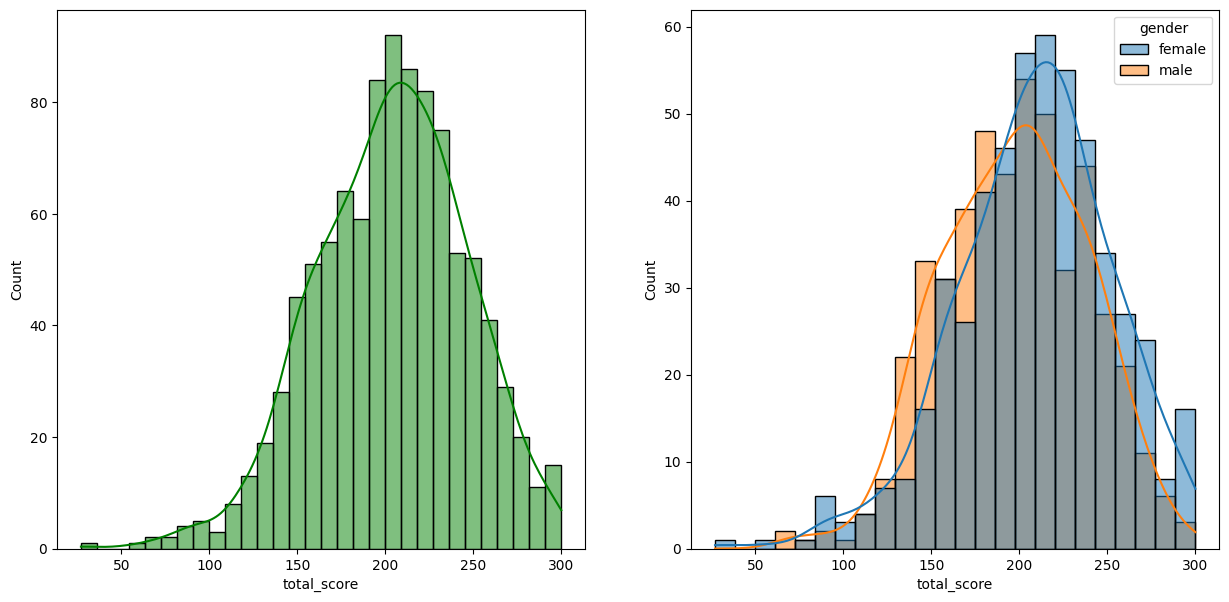

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

##### Insights


Female students perform well than male students

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


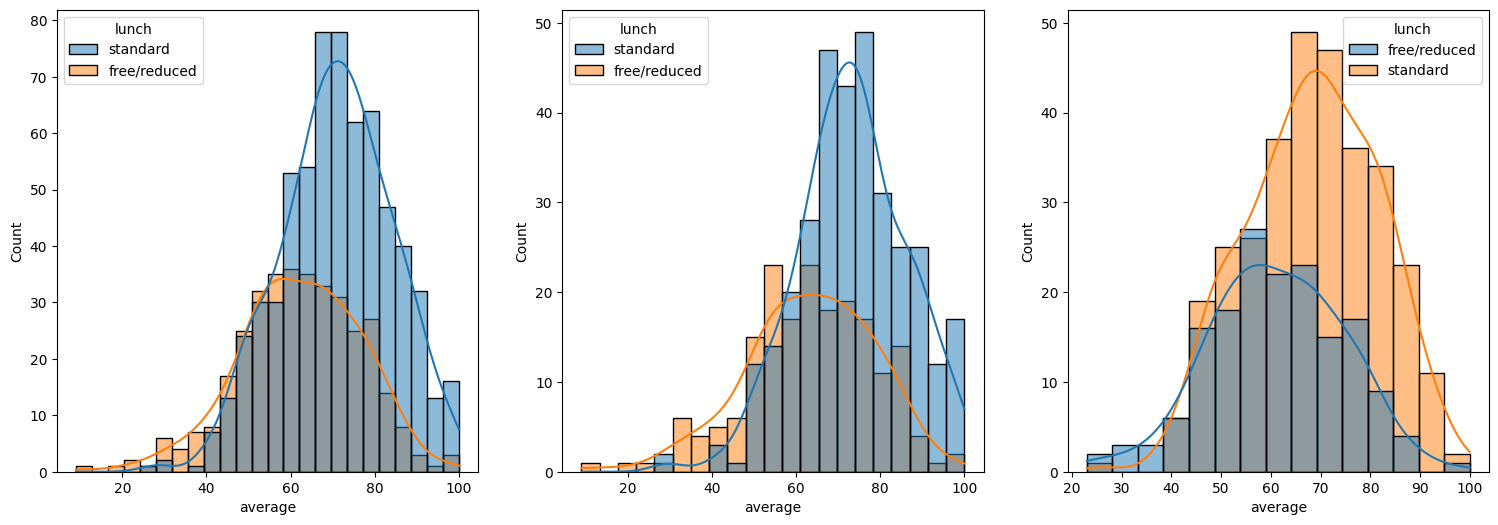

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insight

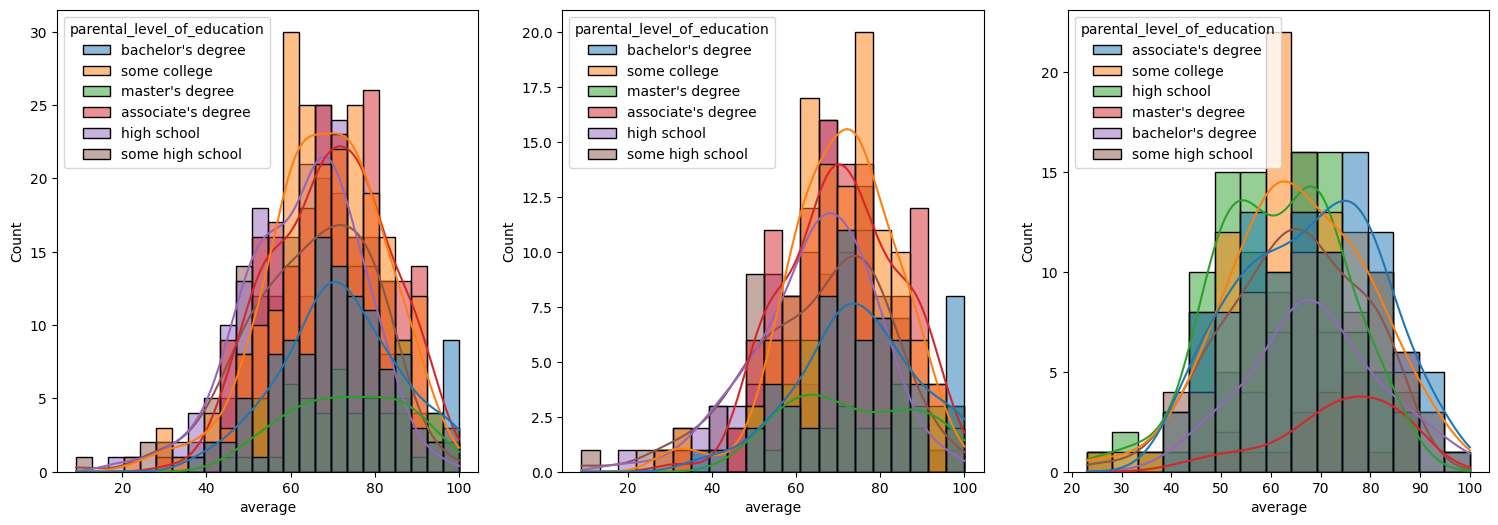

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

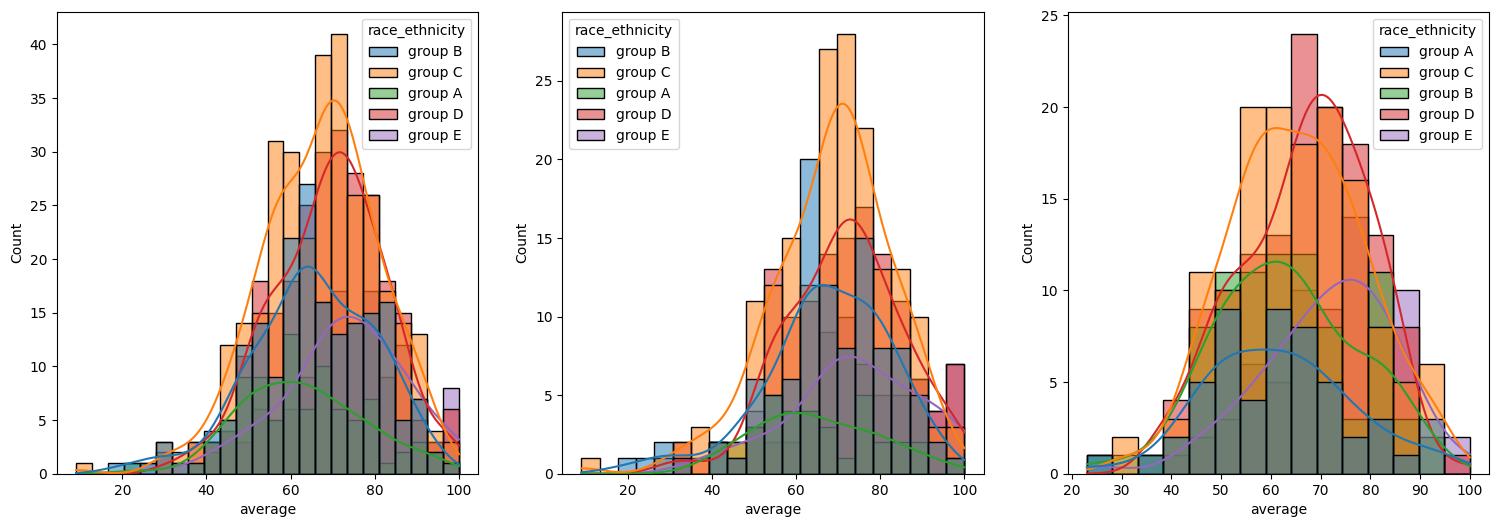

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

# 4.2) Maximum score of students in all the subjects

<AxesSubplot: title={'center': 'writing_score'}, ylabel='writing_score'>

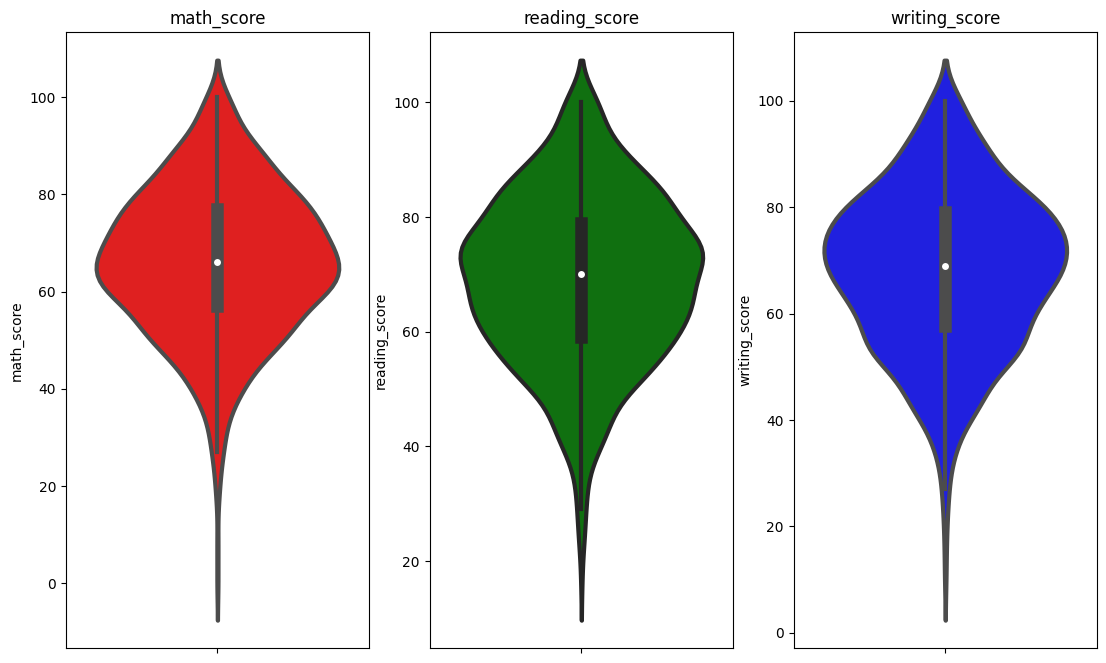

In [21]:
plt.subplots(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('math_score')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading_score')
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing_score')
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)

    

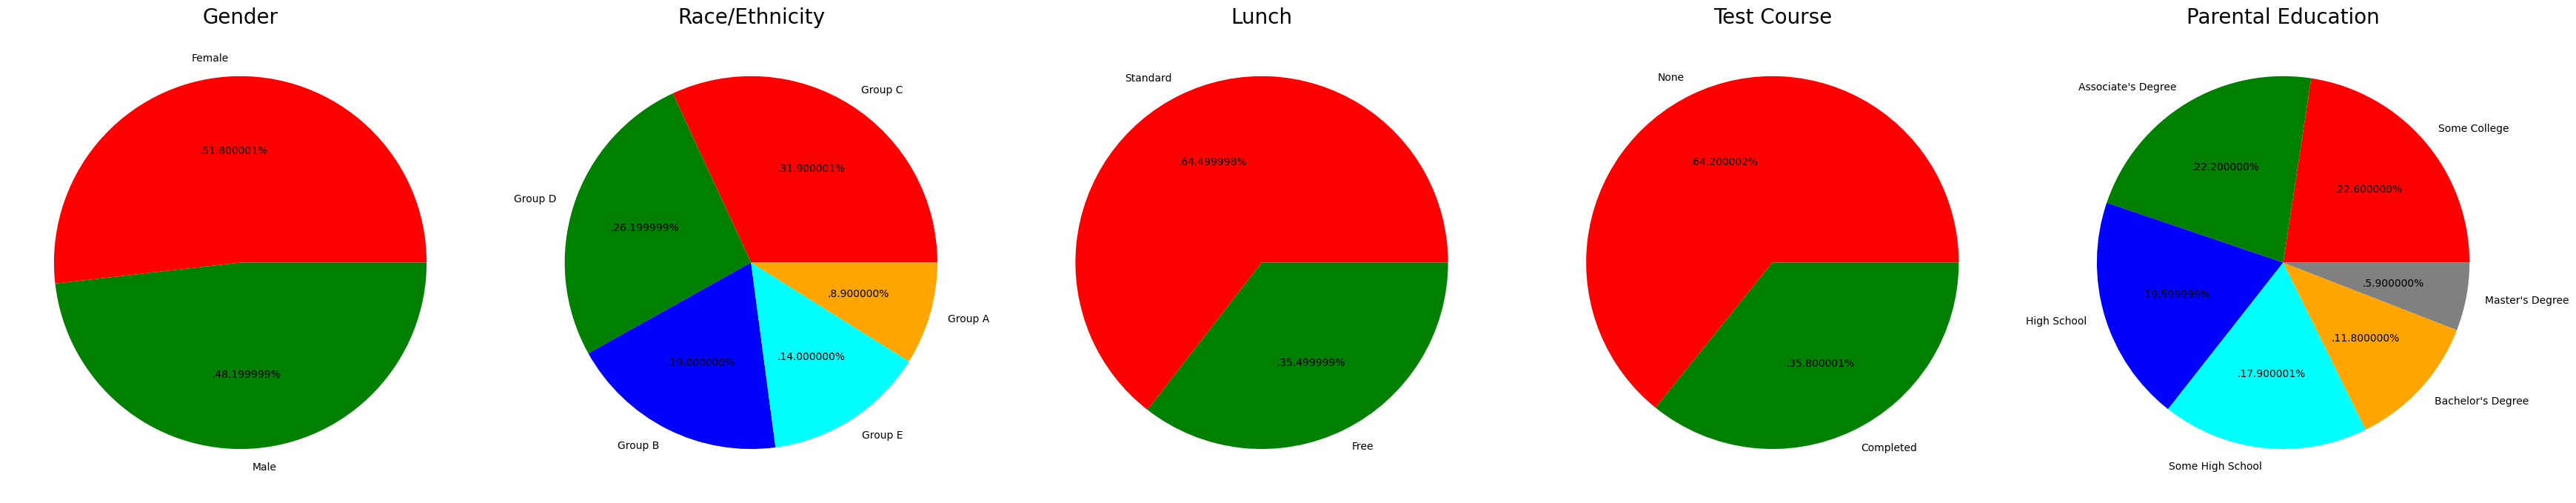

In [22]:
plt.rcParams['figure.figsize'] = (35, 20)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# 4.3 Feature wise Visualization

### 4.3.1) Gender column

1.How is Gender Distrubution
2.Is gender has any impact on students performance

### Univariate anlysis(How is Disturbution of Gender)

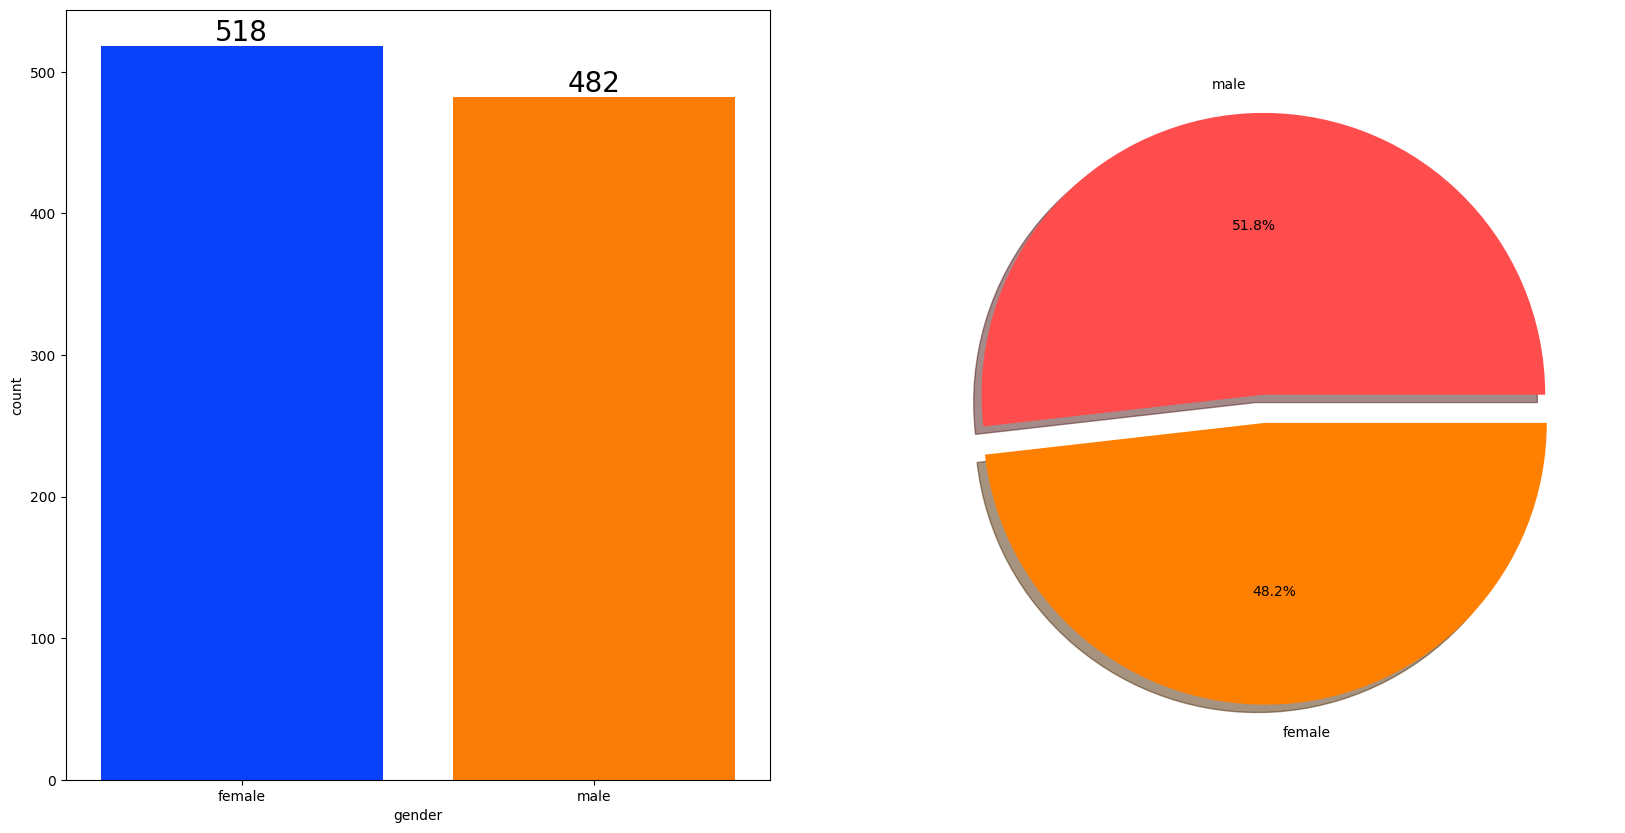

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# Bivariate Analysis(Is gender impact the students performace)

In [24]:
gender_group=df.groupby('gender').mean()

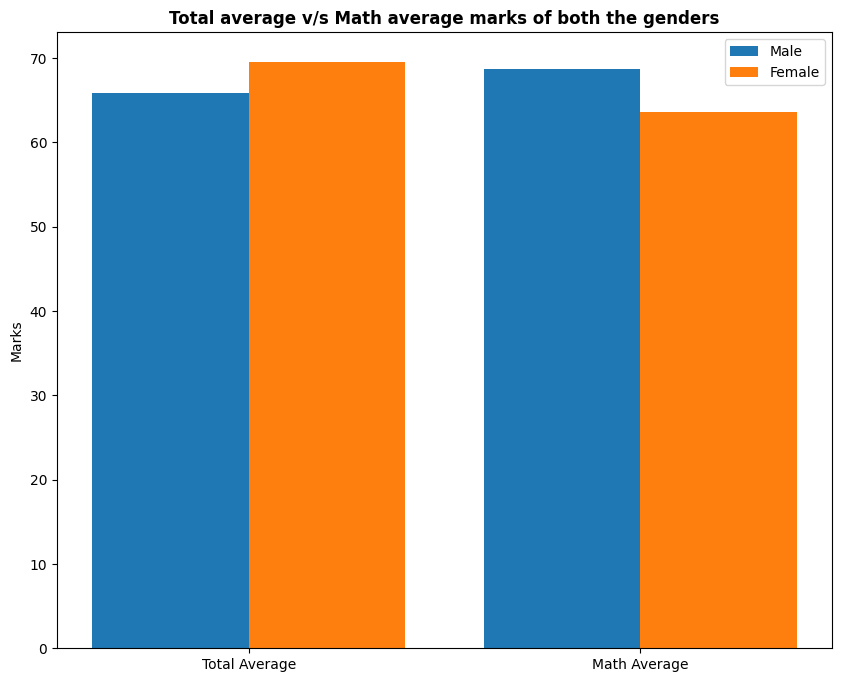

In [25]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
    
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# 4.3.1) race_ethnicity column

#### univariate analysis of race_enthnicity column

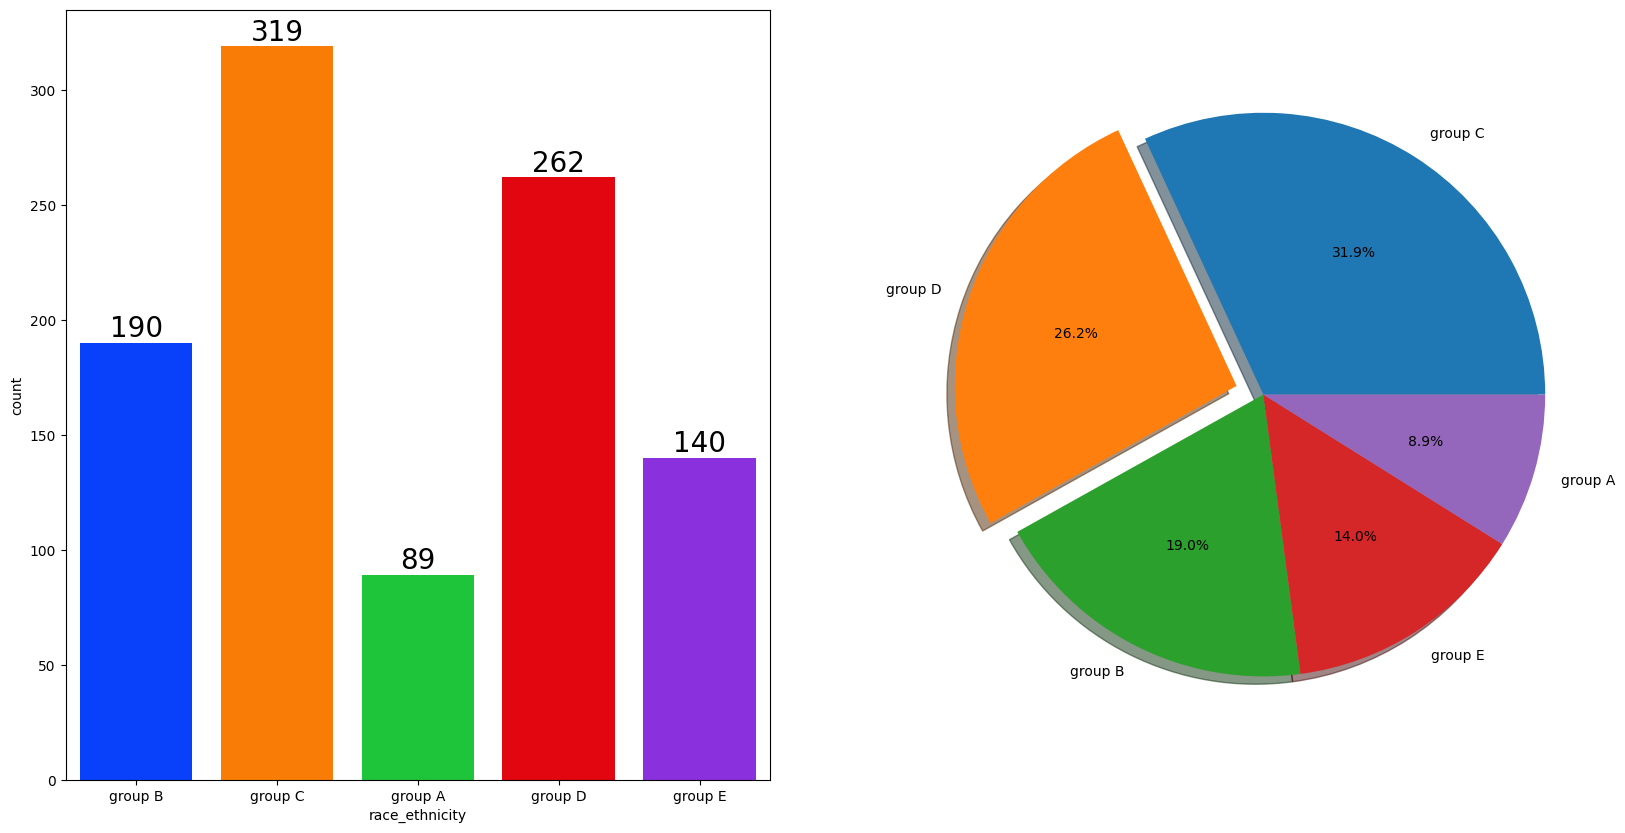

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],palette='bright',data=df,ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0,0.1,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()


## Baivariate analysis (Is the race_ethnicity has any impact on the students performance)

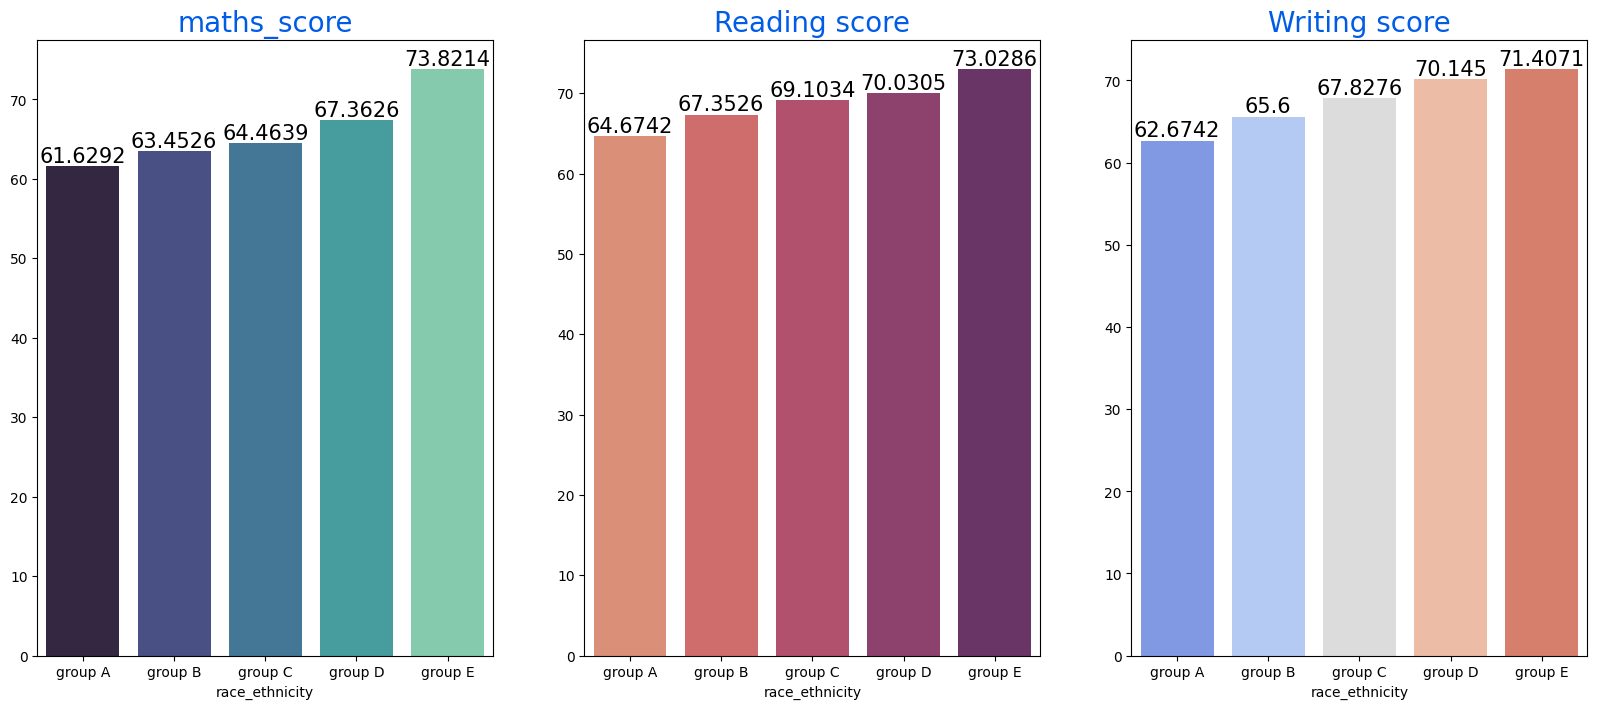

In [27]:
Group_data2=df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('maths_score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# 4.4.2) Parental education level column

### 4.3.2) Univariate anlalysis of Parental education level

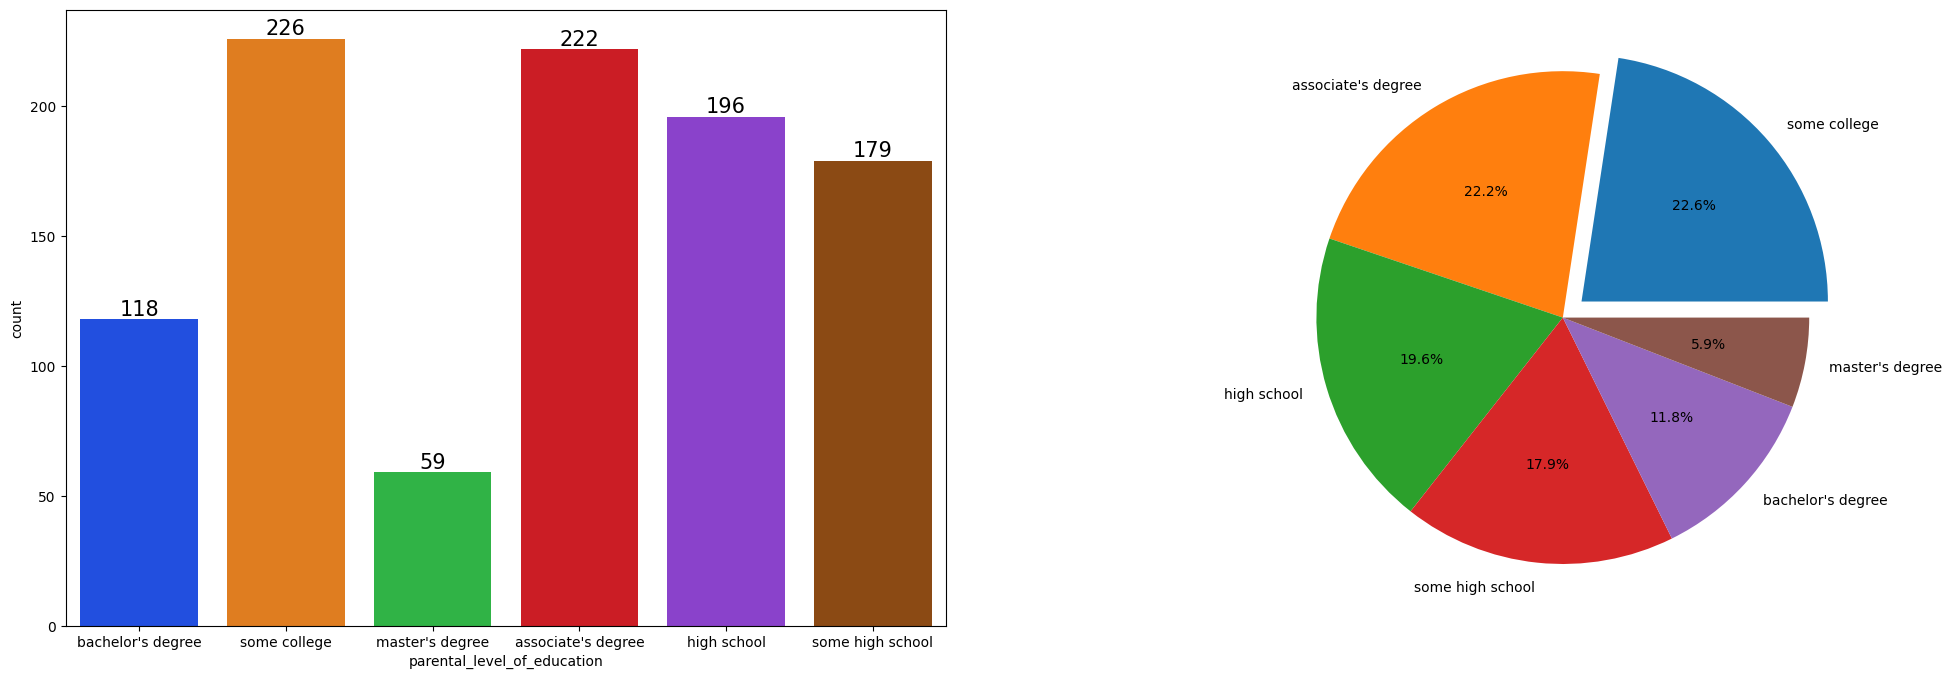

In [28]:
fig,ax=plt.subplots(1,2,figsize=(25,8))
sns.countplot(x=df['parental_level_of_education'],data=df,ax=ax[0],palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
plt.pie(x=df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,autopct='%1.1f%%',explode=[0.1,0,0,0,0,0])
plt.show()

### Bivariate Analysis(is parental education has any on student perforamce)

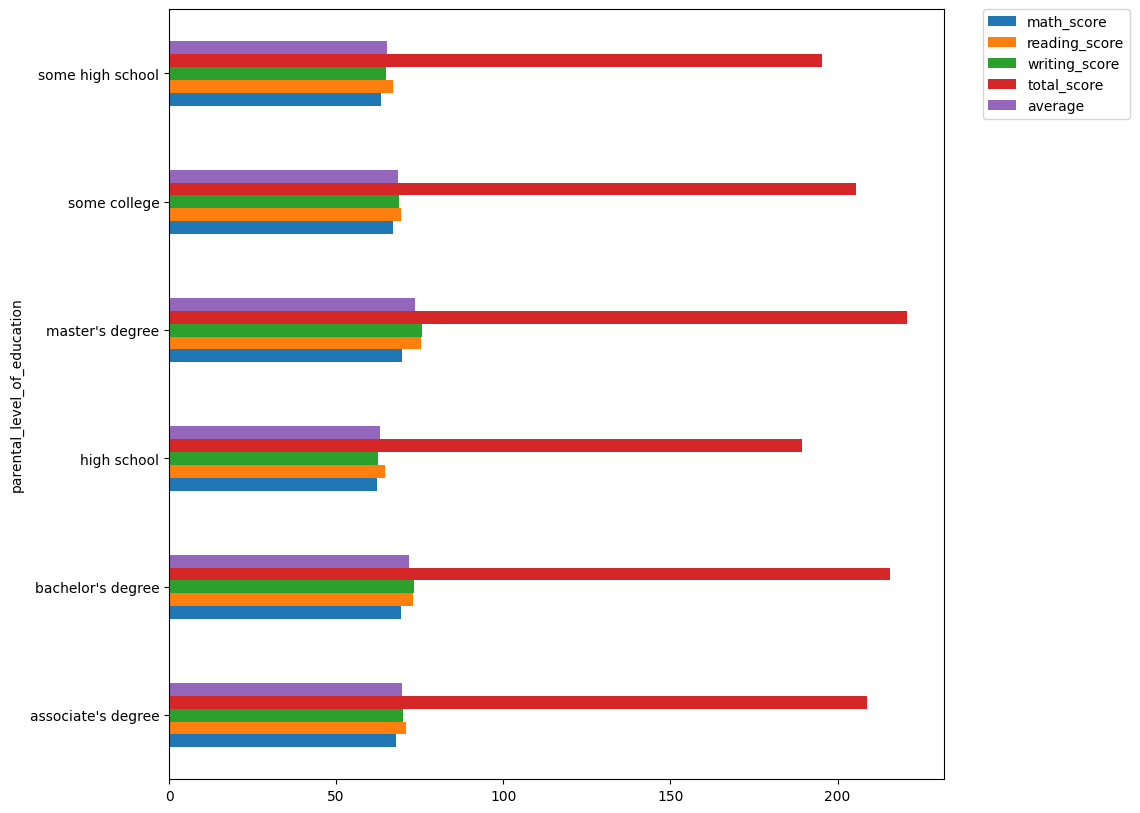

In [29]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 4.3.3) Lunch column

# Univariate anlysis of the data(Lunch column)

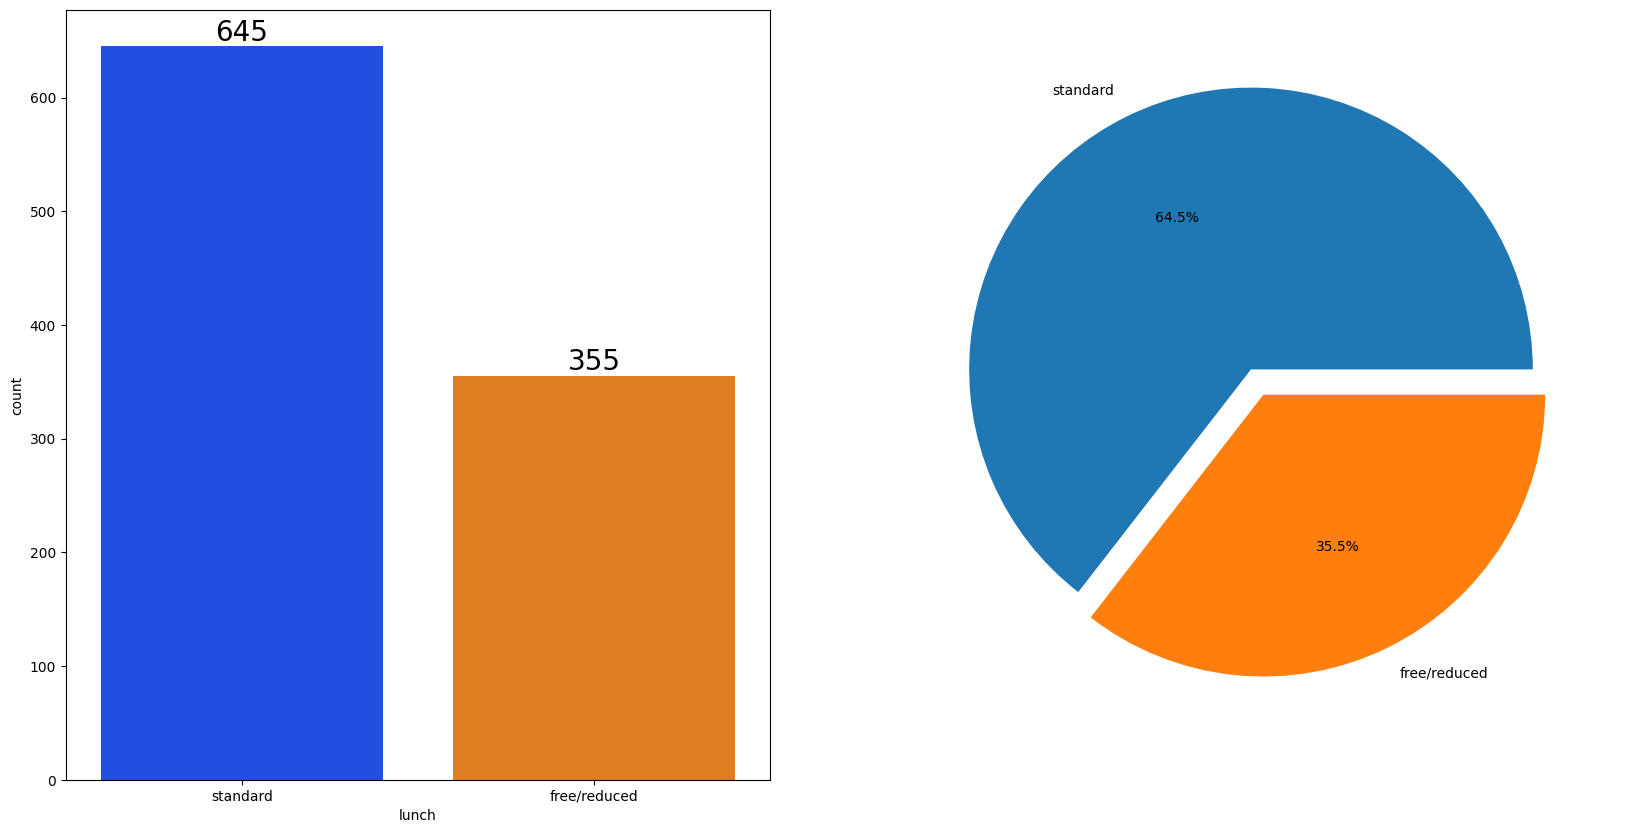

In [30]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,explode=[0.1,0],data=df,autopct='%1.1f%%')
plt.show()

# Bivariate analysis(does there any impact on student performance)

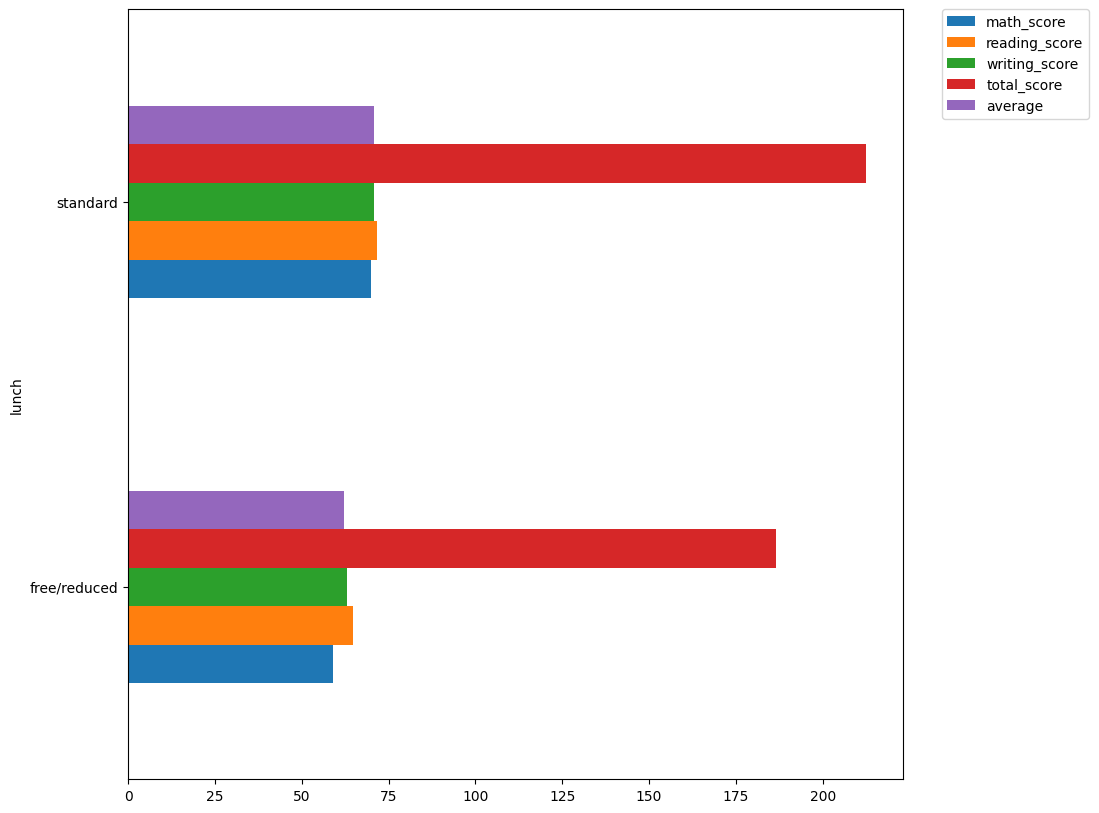

In [31]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 4.3.4) Test preparation course column

### 1.Analysis of the data

<AxesSubplot: xlabel='test_preparation_course', ylabel='count'>

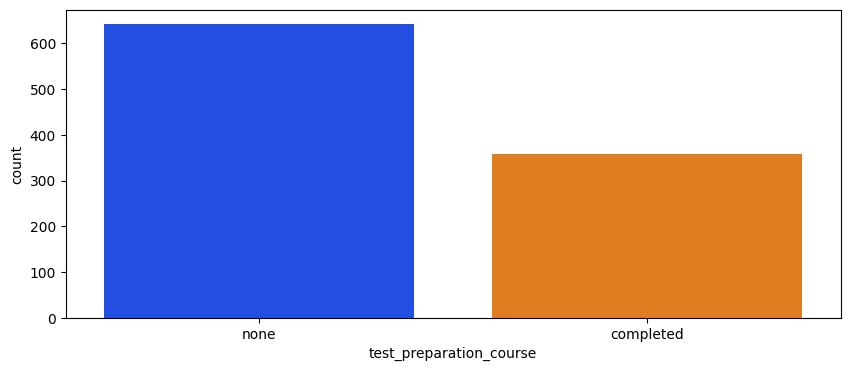

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['test_preparation_course'],data=df,palette='bright')


#### Bivarariet Analysis of test_preparation column(is any effect student performance)

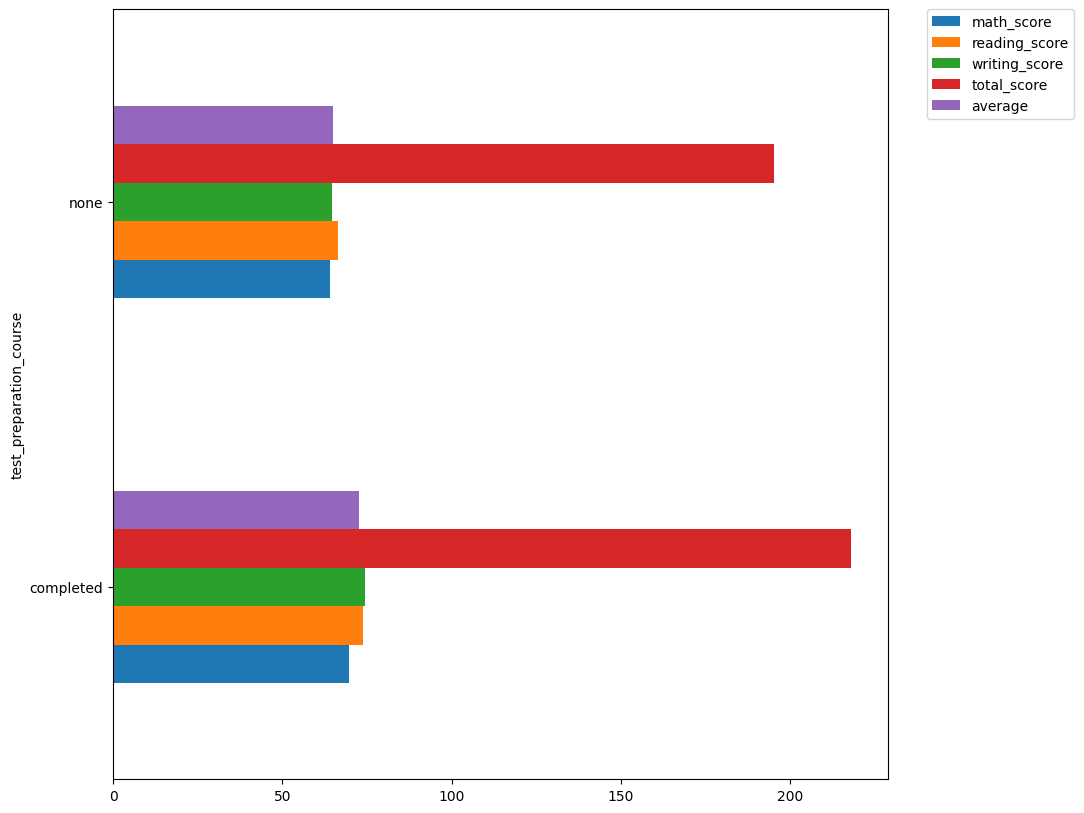

In [33]:
df.groupby('test_preparation_course').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 4.4) Checking the ouliers

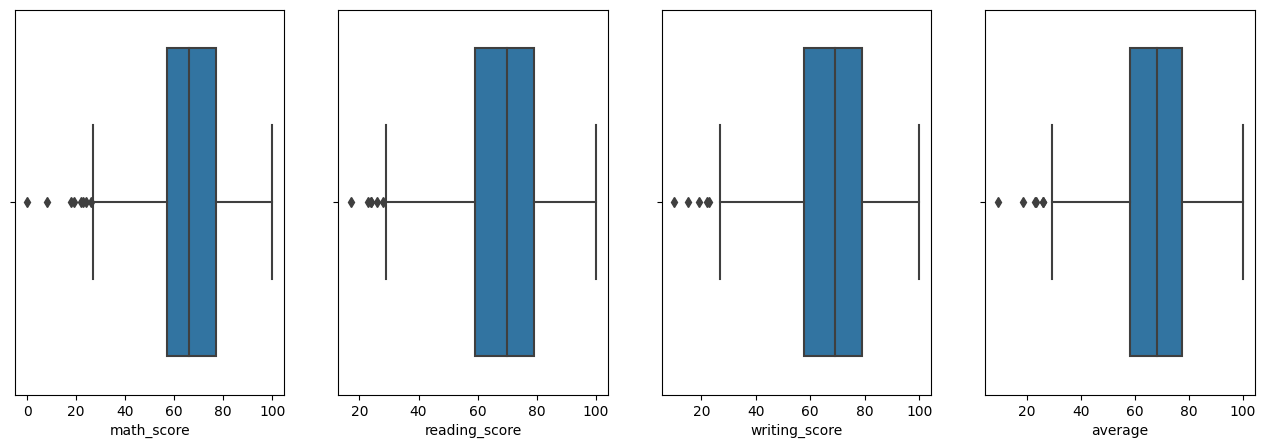

In [34]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(x='math_score',data=df)
plt.subplot(142)
sns.boxplot(x='reading_score',data=df)
plt.subplot(143)
sns.boxplot(x='writing_score',data=df)
plt.subplot(144)
sns.boxplot(x='average',data=df)
plt.show()

# 4.5) Multivariate analysis of usisng pairplot

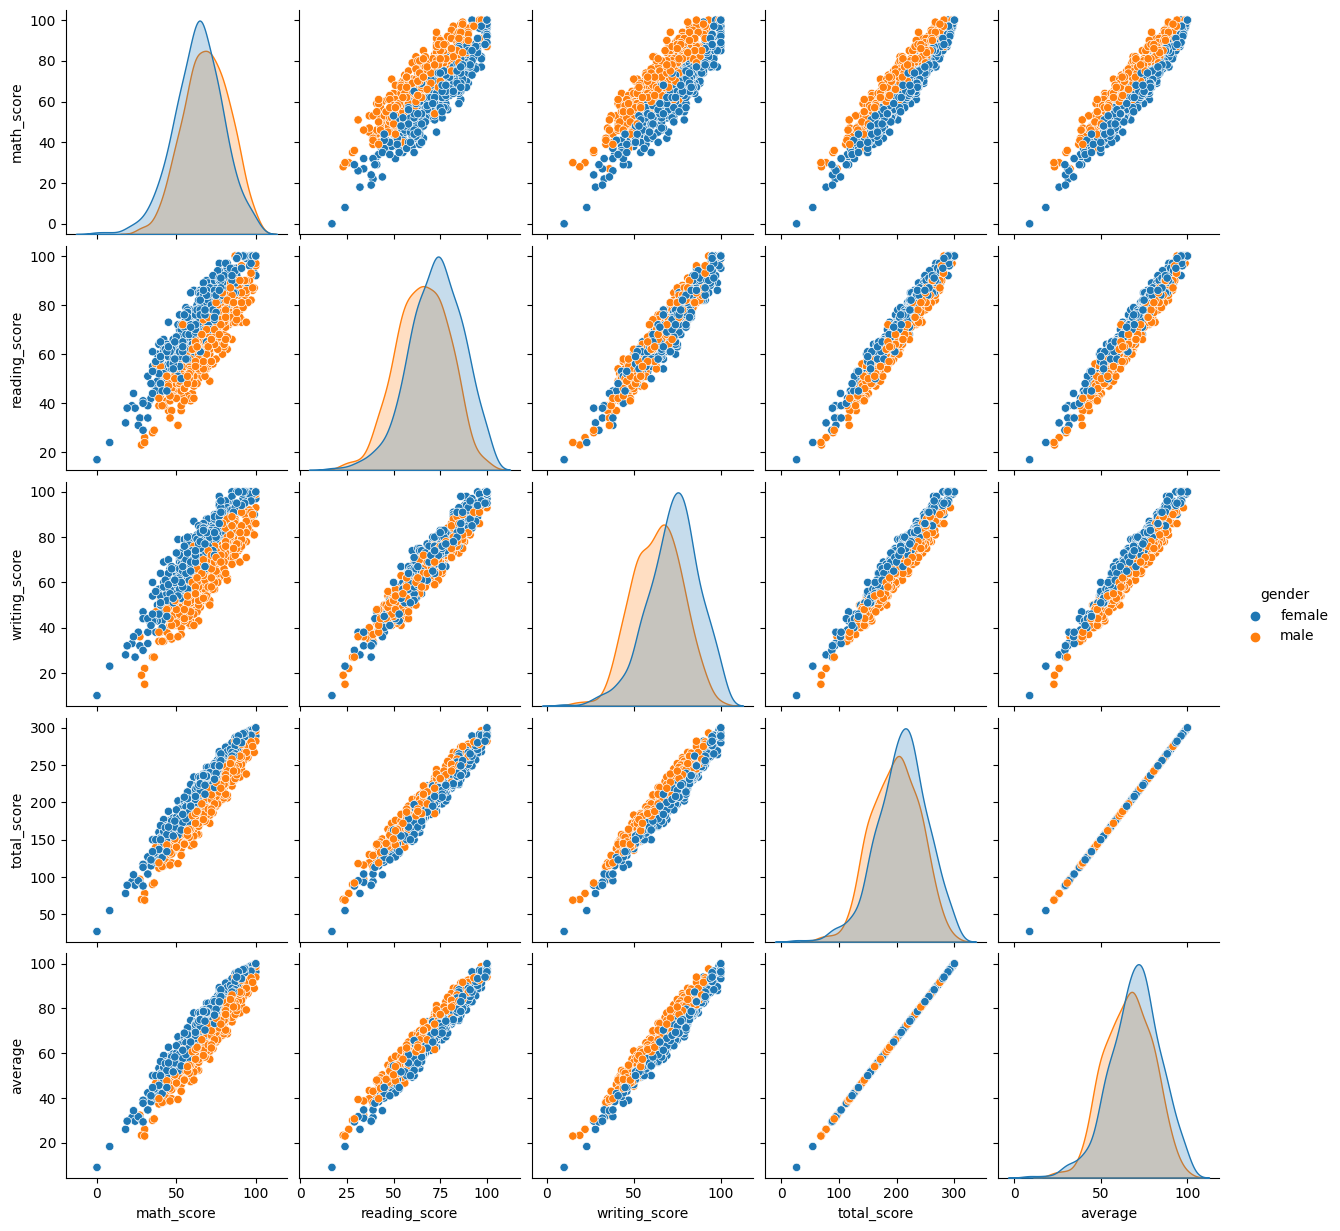

In [35]:
sns.pairplot(df,hue = 'gender')
plt.show()

from above plots it is clear all score increase linearly with each othe

# 5.conclusion